In [75]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib as mt
import seaborn as sb
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
%pylab inline

#load raw data and have a glance of the head part
titanic_raw_data = pd.read_csv(r'C:\data analyst\pj2\project\titanic_data.csv')
titanic_raw_data.head()

Populating the interactive namespace from numpy and matplotlib


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [76]:
# Replace gender by number, 1 representing male, 0 representing female and delete original conlumn
titanic_gender = titanic_raw_data["Sex"]
titanic_gender = titanic_gender.replace("male", 1)
titanic_gender = titanic_gender.replace("female",0)
titanic_raw_data["Gender"] = titanic_gender
del titanic_raw_data["Sex"]
#we do not care about their name and cabin
del titanic_raw_data["Name"]
del titanic_raw_data["Cabin"]
#drop ticket which we are not concerned with
del titanic_raw_data["Ticket"]
#Now get the new raw data
titanic_raw_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Gender
0,1,0,3,22.0,1,0,7.2500,S,1
1,2,1,1,38.0,1,0,71.2833,C,0
2,3,1,3,26.0,0,0,7.9250,S,0
3,4,1,1,35.0,1,0,53.1000,S,0
4,5,0,3,35.0,0,0,8.0500,S,1


In [77]:
#see basic information
titanic_raw_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.477990
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [78]:
#Found that some ages are NA. Compare samples with avaliable age to those without ages info
titanic_raw_data_without_age = titanic_raw_data[titanic_raw_data["Age"].isnull()]
titanic_raw_data_without_age.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
count,177.000000,177.000000,177.000000,0.0,177.000000,177.000000,177.000000,177.000000
mean,435.581921,0.293785,2.598870,NaN,0.564972,0.180791,22.158567,0.700565
std,250.552901,0.456787,0.763216,NaN,1.626316,0.534145,31.874608,0.459310
min,6.000000,0.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000
25%,230.000000,0.000000,3.000000,NaN,0.000000,0.000000,7.750000,0.000000
50%,452.000000,0.000000,3.000000,NaN,0.000000,0.000000,8.050000,1.000000
75%,634.000000,1.000000,3.000000,NaN,0.000000,0.000000,24.150000,1.000000
max,889.000000,1.000000,3.000000,NaN,8.000000,2.000000,227.525000,1.000000


In [79]:
titanic_raw_data_with_age = titanic_raw_data[titanic_raw_data["Age"].notnull()]
titanic_raw_data_with_age.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514,0.634454
std,259.119524,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930,0.481921
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,222.250000,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000,0.000000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700,1.000000
75%,677.750000,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000,1.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200,1.000000


In [80]:
# Chi-Squared Tests
# Gender to Parch
import scipy.stats
pivot = pd.pivot_table(data = titanic_raw_data_without_emb[['Gender', 'Parch Flag']], index = 'Parch Flag', columns = ['Gender'], aggfunc = len)
pivot
print pivot,"\n"
# Pclass      1   2    3
# Survived              
# 0          80  97  372
# 1         136  87  119
chi2, p_value, dof, expected = scipy.stats.chi2_contingency(pivot)
print "Results of Chi-Squared test on Gender to Parch."
print "Does Gender have a significant effect on Parch?"
print "Chi-Squared Score = " + str(chi2)
print "Pvalue = " + str(p_value)
print "\n"

Gender        0    1
Parch Flag          
0           192  484
1           120   93 

Results of Chi-Squared test on Gender to Parch.
Does Gender have a significant effect on Parch?
Chi-Squared Score = 54.2704839693
Pvalue = 1.74706420427e-13




In [81]:
#fig = plt.figure()
#ax = fig.add_subplot(111)

#data_with_pclass1_fare = titanic_raw_data[titanic_raw_data["Pclass"]==1]["Fare"]
#data_with_pclass2_fare = titanic_raw_data[titanic_raw_data["Pclass"]==2]["Fare"]
#data_with_pclass3_fare = titanic_raw_data[titanic_raw_data["Pclass"]==3]["Fare"]
#data_with_pclass_fare = [data_with_pclass1_fare,data_with_pclass2_fare,data_with_pclass3_fare]
#ax.boxplot(data_with_pclass_fare)
#plt.ylim(0,180)
#fig = matplotlib.pyplot.gcf()
#fig.set_size_inches(15, 10)    #figure size
#plt.xlabel('Pclass', fontsize = 18)
#plt.ylabel('Fare',fontsize = 18)
#plt.title('Fare distribution by Pclass', fontsize = 20)
#plt.legend(loc=0, numpoints=1)    #legend size seted to xx-large
#leg = plt.gca().get_legend()
#plt.setp(ltext, fontsize='xx-large') 
#fig.savefig('Fare distribution by Pclass.png', dpi=100)    #export figure
#plt.show()

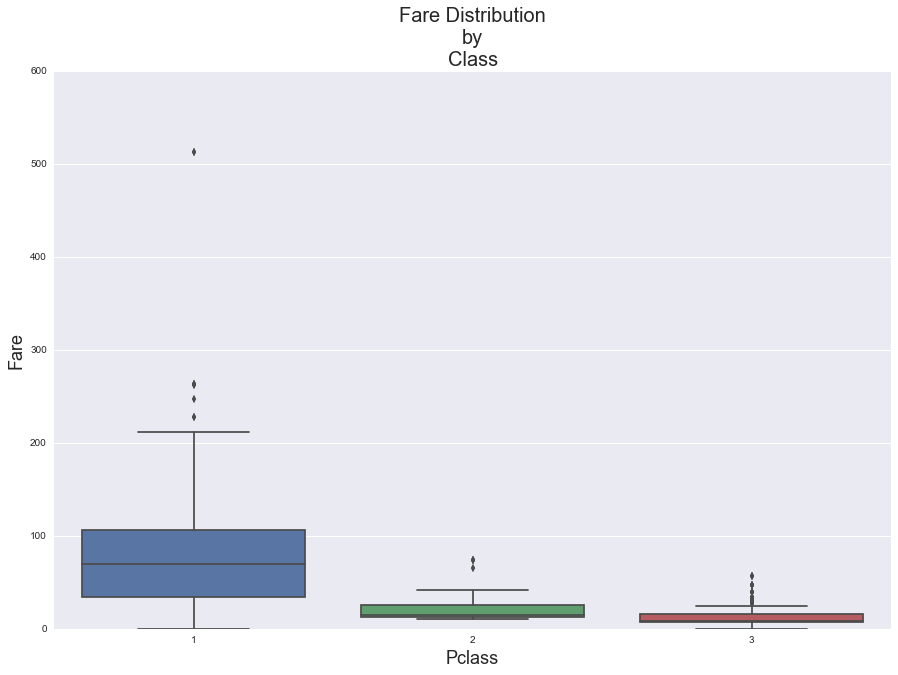

In [82]:
sb.boxplot(data = titanic_raw_data.sort_values(by = 'Pclass').dropna(subset = ['Age', 'Fare']),x = 'Pclass', y = 'Fare')
plt.title('Fare Distribution\nby\nClass',fontsize = 20)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(15, 10)    #figure size
plt.legend(loc=0, numpoints=1)    #legend size seted to xx-large
leg = plt.gca().get_legend()
plt.xlabel('Pclass', fontsize = 18)
plt.ylabel('Fare',fontsize = 18)
fig.savefig('Fare distribution by Pclass.png', dpi=100)    #export figure

In [83]:
del titanic_raw_data["Fare"]
titanic_raw_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Gender
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,0.647587
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,0.477990
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,1.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,1.000000


In [84]:
#T-test variable Parch
a = titanic_raw_data_with_age["Parch"]
b = titanic_raw_data_without_age["Parch"]
t, p = ttest_ind(a, b, equal_var=False)
print "ttest_ind: t = %g  p = %g" % (t, p)

ttest_ind: t = 4.88464  p = 1.46771e-06


In [85]:
#find that there are two samples missed Embarked. Deleted them.
titanic_raw_data_without_emb = titanic_raw_data[titanic_raw_data["Embarked"].notnull()]
titanic_raw_data_without_emb.reset_index(drop = True, inplace = True)
titanic_raw_data_without_emb.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Embarked,Gender
0,1,0,3,22.0,1,0,S,1
1,2,1,1,38.0,1,0,C,0
2,3,1,3,26.0,0,0,S,0
3,4,1,1,35.0,1,0,S,0
4,5,0,3,35.0,0,0,S,1


,Not Survival,Survival
Male,468,109
Female,81,231


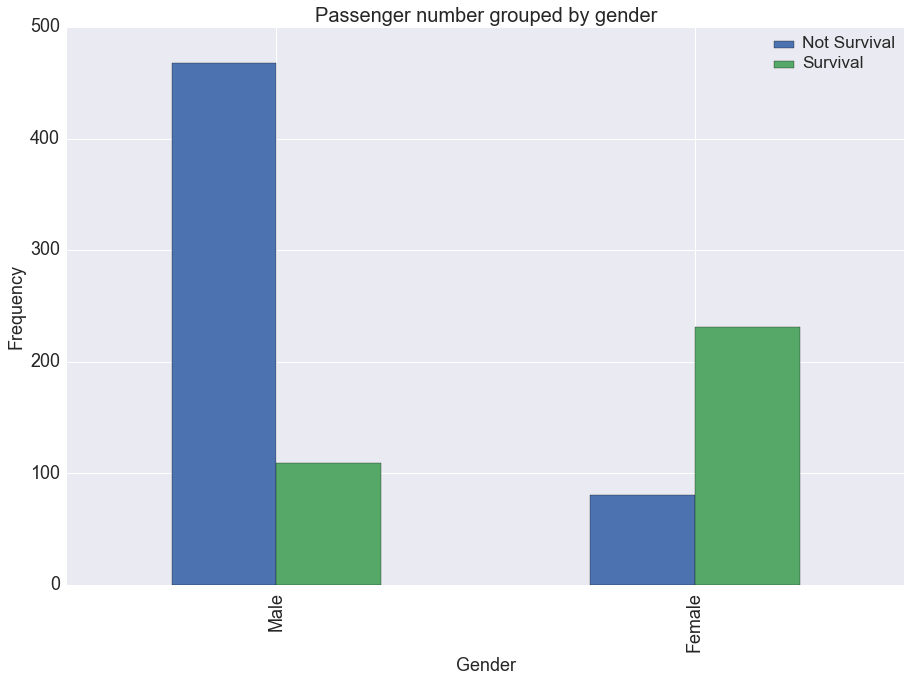

In [86]:
#explore the relationship between survival and Pclss and gender. 
#survival and gender
grouped_data_by_gender = titanic_raw_data_without_emb.groupby(["Survived","Gender"])
#generate a dataframe
grouped_df_by_gender = pd.DataFrame({"Survival":[grouped_data_by_gender.get_group((1,1)).count()["Survived"],
                                   grouped_data_by_gender.get_group((1,0)).count()["Survived"]],
                           "Not Survival":[grouped_data_by_gender.get_group((0,1)).count()["Survived"],
                                     grouped_data_by_gender.get_group((0,0)).count()["Survived"]]},
                          index = ["Male","Female"])
#plot the dataframe, relationship between survival and gender
grouped_df_by_gender.plot.bar(fontsize = 18)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(15, 10)    #figure size
plt.xlabel('Gender', fontsize = 18)
plt.ylabel('Frequency',fontsize = 18)
plt.title('Passenger number grouped by gender', fontsize = 20)
plt.legend(loc=0, numpoints=1)    #legend size seted to xx-large
leg = plt.gca().get_legend()
ltext  = leg.get_texts()
plt.setp(ltext, fontsize='xx-large') 
fig.savefig('Passenger number grouped by gender.png', dpi=100)    #export figure
grouped_df_by_gender

In [87]:
# Chi-Squared Tests
# Gender to Survivability
import scipy.stats
pivot = pd.pivot_table(data = titanic_raw_data[['Survived', 'Gender']], index = 'Survived', columns = ['Gender'], aggfunc = len)
pivot
print pivot,"\n"
chi2, p_value, dof, expected = scipy.stats.chi2_contingency(pivot)
print "Results of Chi-Squared test on Gender to Survival."
print "Does Gender have a significant effect on Survival?"
print "Chi-Squared Score = " + str(chi2)
print "Pvalue = " + str(p_value)
print "\n"

Gender      0    1
Survived          
0          81  468
1         233  109 

Results of Chi-Squared test on Gender to Survival.
Does Gender have a significant effect on Survival?
Chi-Squared Score = 260.717020167
Pvalue = 1.19735706278e-58




,Not Survival,Survival
1,80,134
2,97,87
3,372,119


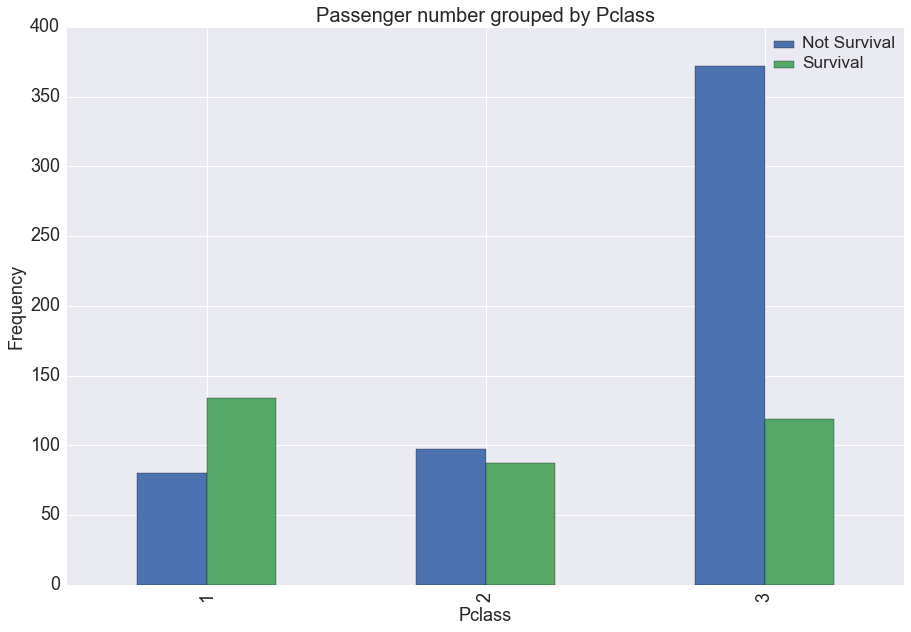

In [88]:
#survival and Pclss
grouped_data_by_pclass = titanic_raw_data_without_emb.groupby(["Survived","Pclass"])
#generate data frame
grouped_df_by_pclass = pd.DataFrame({"Survival":[grouped_data_by_pclass.get_group((1,1)).count()["Survived"],
                                                grouped_data_by_pclass.get_group((1,2)).count()["Survived"],
                                                grouped_data_by_pclass.get_group((1,3)).count()["Survived"]],
                                    "Not Survival":[grouped_data_by_pclass.get_group((0,1)).count()["Survived"],
                                                   grouped_data_by_pclass.get_group((0,2)).count()["Survived"],
                                                   grouped_data_by_pclass.get_group((0,3)).count()["Survived"]]},
                                   index = ["1","2","3"])
#plot the dataframe, relationship between survival and pclass
grouped_df_by_pclass.plot.bar(fontsize = 18)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(15, 10)
plt.xlabel('Pclass', fontsize = 18)
plt.ylabel('Frequency',fontsize = 18)
plt.title('Passenger number grouped by Pclass', fontsize = 20)
plt.legend(loc=0, numpoints=1)
leg = plt.gca().get_legend()
ltext  = leg.get_texts()
plt.setp(ltext, fontsize='xx-large') 
fig.savefig('Passenger number grouped by Pclass.png', dpi=100)
grouped_df_by_pclass

In [89]:
# Chi-Squared Tests
# Pclass to Survivability
import scipy.stats
pivot = pd.pivot_table(data = titanic_raw_data[['Survived', 'Pclass']], index = 'Survived', columns = ['Pclass'], aggfunc = len)
pivot
print pivot,"\n"
chi2, p_value, dof, expected = scipy.stats.chi2_contingency(pivot)
print "Results of Chi-Squared test on Pclass to Survival."
print "Does Pclass have a significant effect on Survival?"
print "Chi-Squared Score = " + str(chi2)
print "Pvalue = " + str(p_value)
print "\n"

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119 

Results of Chi-Squared test on Pclass to Survival.
Does Pclass have a significant effect on Survival?
Chi-Squared Score = 102.888988757
Pvalue = 4.5492517113e-23




In [90]:
#survival and parch. See the num of people with parents and children on board.
titanic_raw_data_without_emb[titanic_raw_data_without_emb["Parch"] != 0].count()
titanic_raw_data_without_emb.groupby("Parch").count()

,PassengerId,Survived,Pclass,Age,SibSp,Embarked,Gender
Parch,,,,,,,
0,676,676,676,519,676,676,676
1,118,118,118,110,118,118,118
2,80,80,80,68,80,80,80
3,5,5,5,5,5,5,5
4,4,4,4,4,4,4,4
5,5,5,5,5,5,5,5
6,1,1,1,1,1,1,1


C:\data analyst\Anaconda2\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Not Survival,Survival
0,445,231
1,104,109


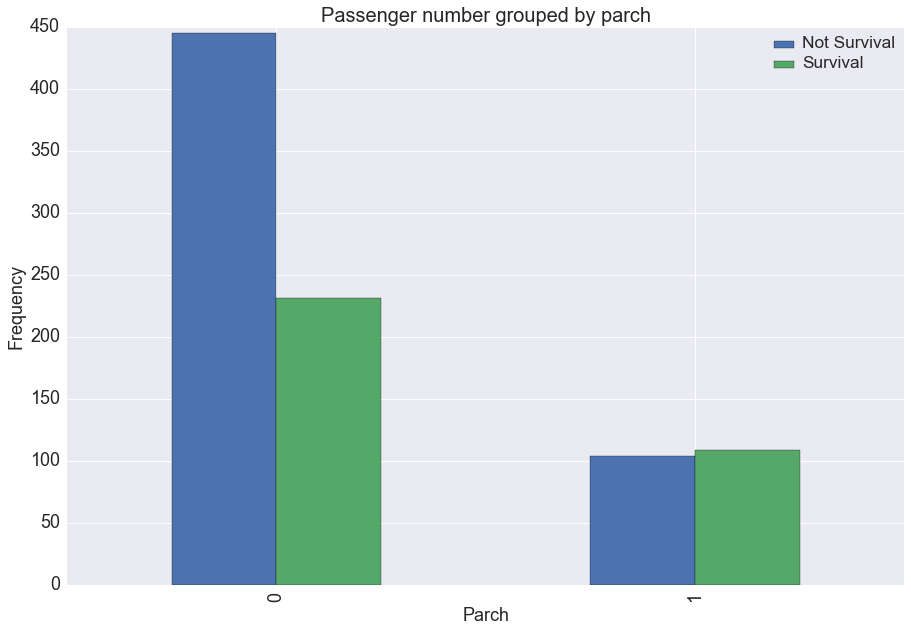

In [91]:
#survival and parch
#flag samples with parents and children on board using 1 and samples without parents and children using 0
flag_list = []
parch_list = titanic_raw_data_without_emb["Parch"]
i = 0
while i < len(parch_list):
    if parch_list[i] == 0:
        flag_list.append(0)
    else:
        flag_list.append(1)
    i += 1
titanic_raw_data_without_emb["Parch Flag"] = flag_list
grouped_data_by_parch = titanic_raw_data_without_emb.groupby(["Survived","Parch Flag"])
#generate data frame
grouped_df_by_pclass = pd.DataFrame({"Survival":[grouped_data_by_parch.get_group((1,0)).count()["Survived"],
                                                grouped_data_by_parch.get_group((1,1)).count()["Survived"]],
                                    "Not Survival":[grouped_data_by_parch.get_group((0,0)).count()["Survived"],
                                                   grouped_data_by_parch.get_group((0,1)).count()["Survived"]]},
                                   index = ["0","1"])
#plot the dataframe, relationship between survival and parch
grouped_df_by_pclass.plot.bar(fontsize = 18)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(15, 10)
plt.xlabel('Parch', fontsize = 18)
plt.ylabel('Frequency',fontsize = 18)
plt.title('Passenger number grouped by parch', fontsize = 20)
plt.legend(loc=0, numpoints=1)
leg = plt.gca().get_legend()
ltext  = leg.get_texts()
plt.setp(ltext, fontsize='xx-large') 
fig.savefig('Passenger number grouped by parch.png', dpi=100)
grouped_df_by_pclass

In [92]:
#have age or not
flag_list = []
parch_list = titanic_raw_data_without_emb["Age"]
i = 0
while i < len(parch_list):
    if parch_list[i] != parch_list[i]:
        flag_list.append(0)
    else:
        flag_list.append(1)
    i += 1
titanic_raw_data_without_emb["Age Flag"] = flag_list

C:\data analyst\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [93]:
# Chi-Squared Tests
# Age Flag to Pclass
import scipy.stats
pivot = pd.pivot_table(data = titanic_raw_data_without_emb[['Age Flag', 'Pclass']], index = 'Pclass', columns = ['Age Flag'], aggfunc = len)
pivot
print pivot,"\n"
chi2, p_value, dof, expected = scipy.stats.chi2_contingency(pivot)
print "Results of Chi-Squared test on Age Flag to Pclass."
print "Does Age Flag have a significant effect on Pclass?"
print "Chi-Squared Score = " + str(chi2)
print "Pvalue = " + str(p_value)
print "\n"

Age Flag    0    1
Pclass            
1          30  184
2          11  173
3         136  355 

Results of Chi-Squared test on Age Flag to Pclass.
Does Age Flag have a significant effect on Pclass?
Chi-Squared Score = 45.7330447133
Pvalue = 1.1727232089e-10




In [94]:
#have sib or not
flag_list = []
parch_list = titanic_raw_data_without_emb["SibSp"]
i = 0
while i < len(parch_list):
    if parch_list[i] == 0:
        flag_list.append(0)
    else:
        flag_list.append(1)
    i += 1
titanic_raw_data_without_emb["SibSp Flag"] = flag_list

C:\data analyst\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [95]:
# Chi-Squared Tests
# Age Flag to SibSp Flag
import scipy.stats
pivot = pd.pivot_table(data = titanic_raw_data_without_emb[['Age Flag', 'SibSp Flag']], index = 'SibSp Flag', columns = ['Age Flag'], aggfunc = len)
pivot
print pivot,"\n"
chi2, p_value, dof, expected = scipy.stats.chi2_contingency(pivot)
print "Results of Chi-Squared test on Age Flag to SibSp Flag."
print "Does Age Flag have a significant effect on SibSp?"
print "Chi-Squared Score = " + str(chi2)
print "Pvalue = " + str(p_value)
print "\n"

Age Flag      0    1
SibSp Flag          
0           137  469
1            40  243 

Results of Chi-Squared test on Age Flag to SibSp Flag.
Does Age Flag have a significant effect on SibSp?
Chi-Squared Score = 8.16198214693
Pvalue = 0.00427775937203




In [97]:
# Chi-Squared Tests
# Age Flag to Parch Flag
import scipy.stats
pivot = pd.pivot_table(data = titanic_raw_data_without_emb[['Age Flag', 'Parch Flag']], index = 'Parch Flag', columns = ['Age Flag'], aggfunc = len)
pivot
print pivot,"\n"
chi2, p_value, dof, expected = scipy.stats.chi2_contingency(pivot)
print "Results of Chi-Squared test on Age Flag to Parch Flag."
print "Does Age Flag have a significant effect on Parch Flag?"
print "Chi-Squared Score = " + str(chi2)
print "Pvalue = " + str(p_value)
print "\n"

Age Flag      0    1
Parch Flag          
0           157  519
1            20  193 

Results of Chi-Squared test on Age Flag to Parch Flag.
Does Age Flag have a significant effect on Parch Flag?
Chi-Squared Score = 18.5842069061
Pvalue = 1.62561739747e-05




In [98]:
# Chi-Squared Tests
# Age Flag to Gender
import scipy.stats
pivot = pd.pivot_table(data = titanic_raw_data_without_emb[['Age Flag', 'Gender']], index = 'Gender', columns = ['Age Flag'], aggfunc = len)
pivot
print pivot,"\n"
chi2, p_value, dof, expected = scipy.stats.chi2_contingency(pivot)
print "Results of Chi-Squared test on Age Flag to Gender."
print "Does Age Flag have a significant effect on Gender?"
print "Chi-Squared Score = " + str(chi2)
print "Pvalue = " + str(p_value)
print "\n"

Age Flag    0    1
Gender            
0          53  259
1         124  453 

Results of Chi-Squared test on Age Flag to Gender.
Does Age Flag have a significant effect on Gender?
Chi-Squared Score = 2.30069510697
Pvalue = 0.129316115859




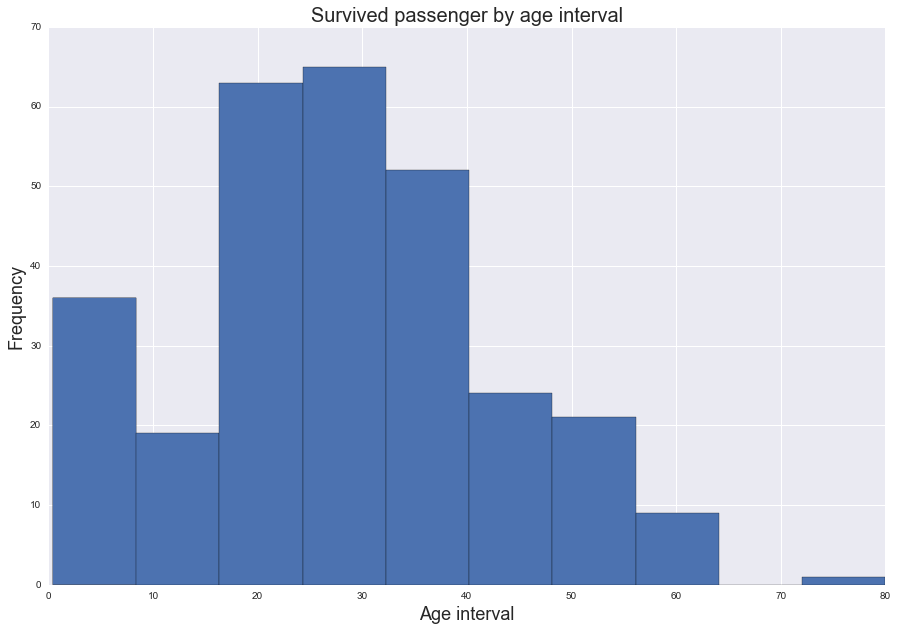

In [99]:
#explore relationship between survival and combination of age and pclass, assuming that with-age group has the same trend 
#with the withou-age group
#delete samples without age, since genders are not different between male and female group.
survival1_figure = plt.figure(1)
data1 = titanic_raw_data_with_age[["Age","Survived"]]
data1_survived = data1[data1["Survived"] == 1]["Age"]
data1_survived.hist()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(15, 10)

plt.xlabel('Age interval', fontsize = 18)
plt.ylabel('Frequency',fontsize = 18)
plt.title('Survived passenger by age interval', fontsize = 20)
fig.savefig('Survived passenger by age interval.png', dpi=100)

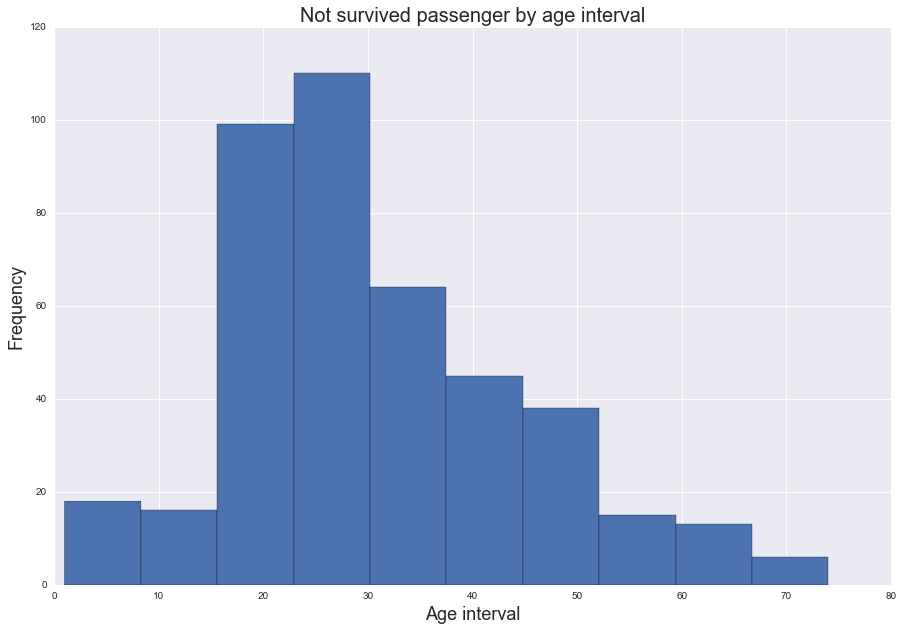

In [100]:
data1_not_survived = data1[data1["Survived"] == 0]["Age"]
data1_not_survived.hist()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(15, 10)
plt.xlabel('Age interval', fontsize = 18)
plt.ylabel('Frequency',fontsize = 18)
plt.title('Not survived passenger by age interval', fontsize = 20)
fig.savefig('Not survived passenger by age interval.png', dpi=100)

In [101]:
#relationship between survival and age interval
#grouped people into age interval
i = 0
age_interval = []
titanic_raw_data_with_age.reset_index(inplace = True, drop = True)
age_list = titanic_raw_data_with_age["Age"]
while i < len(titanic_raw_data_with_age):
    if age_list[i] < 10:
        age_interval.append("0-10")
    elif age_list[i] < 20 and age_list[i] >= 10:
        age_interval.append("10-20")
    elif age_list[i] < 30 and age_list[i] >= 20:
        age_interval.append("20-30")
    elif age_list[i] < 40 and age_list[i] >= 30:
        age_interval.append("30-40")
    elif age_list[i] < 50 and age_list[i] >= 40:
        age_interval.append("40-50")
    elif age_list[i] < 60 and age_list[i] >= 50:
        age_interval.append("50-60")
    elif age_list[i] < 70 and age_list[i] >= 60:
        age_interval.append("60-70")
    else:
        age_interval.append("70-80")
    i = i+1
data_with_age_interval = titanic_raw_data_with_age
data_with_age_interval["Age Interval"] = age_interval

C:\data analyst\Anaconda2\lib\site-packages\ipykernel\__main__.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [102]:
#get age interval and survived columns
data_with_age_interval = data_with_age_interval.loc[:,["Survived","Age Interval"]]

In [103]:
#count number of people survived at each age interval
data_with_age_interval_survival = data_with_age_interval[data_with_age_interval["Survived"] == 1]
data_with_age_interval_not_survival = data_with_age_interval[data_with_age_interval["Survived"] == 0]
count_survival_age_interval = data_with_age_interval_survival.groupby("Age Interval").count()
count_survival_age_interval

,Survived
Age Interval,
0-10,38
10-20,41
20-30,77
30-40,73
40-50,34
50-60,20
60-70,6
70-80,1


In [104]:
#count number of people not survived at each age interval
count_not_survival_age_interval = data_with_age_interval_not_survival.groupby("Age Interval").count()
count_not_survival_age_interval

,Survived
Age Interval,
0-10,24
10-20,61
20-30,143
30-40,94
40-50,55
50-60,28
60-70,13
70-80,6


In [105]:
#merge the two data frames
survival_and_age_interval = pd.concat([count_survival_age_interval, count_not_survival_age_interval], axis=1)
survival_and_age_interval.columns = ["Survived","Not Survived"]
survival_and_age_interval

,Survived,Not Survived
Age Interval,,
0-10,38,24
10-20,41,61
20-30,77,143
30-40,73,94
40-50,34,55
50-60,20,28
60-70,6,13
70-80,1,6


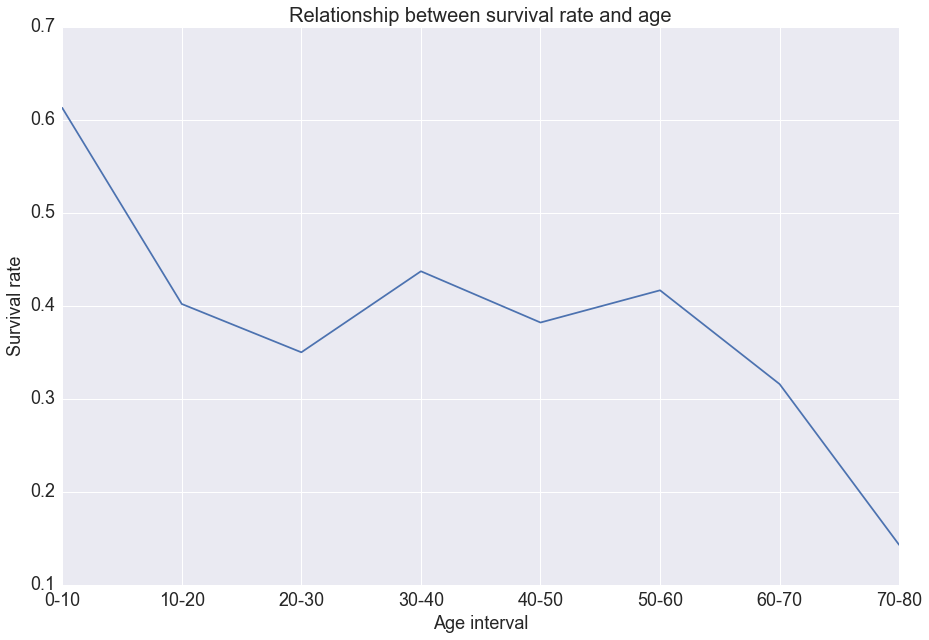

In [106]:
#count survival rate for each age interval
#sum survived and unsurvived people at each age interval
total_list = survival_and_age_interval["Survived"]+survival_and_age_interval["Not Survived"]
survival_and_age_interval["Total"] = total_list
#count survival rate
survival_rate_age_interval = survival_and_age_interval["Survived"]/survival_and_age_interval["Total"]
#plot survival rate with respect to age interval
survival_rate_age_interval.plot(fontsize = 18)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(15, 10)
plt.xlabel('Age interval', fontsize = 18)
plt.ylabel('Survival rate',fontsize = 18)
plt.title('Relationship between survival rate and age', fontsize = 20)
fig.savefig('Relationship between survival rate and age', dpi=100)

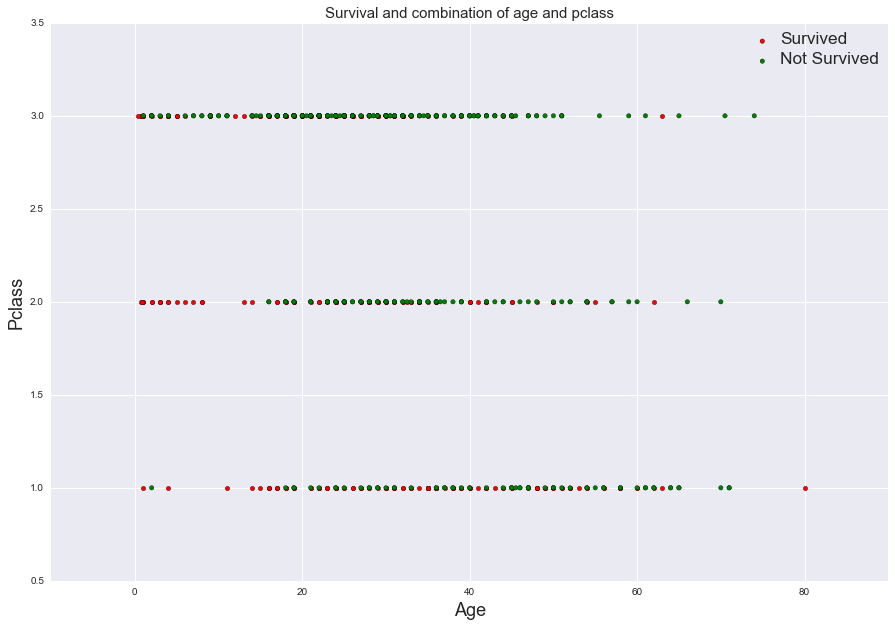

In [107]:
#explore relationship between survival and combination of age and Pclass
data_with_age_pclass = titanic_raw_data_with_age.loc[:,["Age","Pclass","Survived"]]
data_with_age_pclass_survive = data_with_age_pclass[data_with_age_pclass["Survived"] == 1]
data_with_age_pclass_not_survive = data_with_age_pclass[data_with_age_pclass["Survived"] == 0]
ax = data_with_age_pclass_survive.plot.scatter(x = "Age", y = "Pclass", color = "red", label = "Survived")
data_with_age_pclass_not_survive.plot.scatter(x = "Age",y = "Pclass", color = "Green", label = "Not Survived", ax = ax,
                                             s = data_with_age_pclass_survive["Survived"]*20)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(15, 10)
plt.xlabel('Age', fontsize = 18)
plt.ylabel('Pclass',fontsize = 18)
plt.title('Survival and combination of age and pclass', fontsize = 15)
plt.legend(loc=0, numpoints=1)
leg = plt.gca().get_legend()
ltext  = leg.get_texts()
plt.setp(ltext, fontsize='xx-large') 
fig.savefig('Survival and combination of age and pclass.png', dpi=100)

In [109]:
titanic_raw_data_without_emb.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Embarked,Gender,Parch Flag,Age Flag,SibSp Flag
0,1,0,3,22.0,1,0,S,1,0,1,1
1,2,1,1,38.0,1,0,C,0,0,1,1
2,3,1,3,26.0,0,0,S,0,0,1,0
3,4,1,1,35.0,1,0,S,0,0,1,1
4,5,0,3,35.0,0,0,S,1,0,1,0
